In [1]:
#Import Nescessary Packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
from matplotlib.patches import Patch

In [2]:
#Loading Forms
#Ignore Lines Starting With #
#Ensure You Put This File With Your Excel/CSV... In One Folder
#Change the form's name to yours and then just need to run the program!
df_new = pd.read_csv("New_users_each_day.csv",comment="#").dropna()
df_return = pd.read_csv("Returning_users_each_day.csv",comment="#").dropna()
#Convert first column to integer
df_new.iloc[:, 0] = pd.to_numeric(df_new.iloc[:, 0], downcast='integer')
df_return.iloc[:, 0] = pd.to_numeric(df_return.iloc[:, 0], downcast='integer')
df_new.iloc[:, 1] = pd.to_numeric(df_new.iloc[:, 1], downcast='integer')
df_return.iloc[:, 1] = pd.to_numeric(df_return.iloc[:, 1], downcast='integer')

C:\Users\lenovo\AppData\Local\Temp\ipykernel_4228\96550642.py:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_new.iloc[:, 0] = pd.to_numeric(df_new.iloc[:, 0], downcast='integer')
C:\Users\lenovo\AppData\Local\Temp\ipykernel_4228\96550642.py:9: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_return.iloc[:, 0] = pd.to_numeric(df_return.iloc[:, 0], downcast='integer')
C:\Users\lenovo\AppData\Local\Temp\ipykernel_4228\96550642.py:10: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace 

In [3]:
#Preview Data
#Check if you loaded it successfully
print(df_new.head())
print(df_return.head())

   Nth day  New users
0        0        106
1        1        173
2        2        194
3        3        174
4        4        131
   Nth day  Returning users
0        0               14
1        1               39
2        2               28
3        3               32
4        4               29


In [4]:
def stacked_user(
    timerange="Your Timerange",#Enter the timerange of the dataset
    figsize1=20,#Figure width
    figsize2=20,#Figure height
    txtfont=15,#Text fontsize
    xtickfont=15,#Xtick fontsize
    xfont=30,#Xlabel fontsize
    yfont=30,#Ylabel fontsize
    titlefont=40,#Title fontsize
    subfont=15#Subtitle fontsize
    ):
    #Initialization
    fig, ax = plt.subplots(figsize=(figsize1, figsize2))
    dots = [
        list(df_new["New users"]), list(df_return["Returning users"])
    ]
    colors = ["red","blue"]
    index = list(df_new["Nth day"] + 1)
    
    #Plot stacked line charts
    for dot, color in zip(dots, colors):
        ax.plot(index, dot, color=color)
        ax.scatter(index, dot, fc=color)
        #Label each point
        for i, value in enumerate(dot):
            ax.text(index[i], value, f"{value}", ha='center', va='bottom', fontsize = txtfont)
    #Add xticks
    ax.set_xticks(index)
    ax.set_xticklabels(index,ha="right",fontsize=xtickfont)
    #Axis
    plt.xlabel("Day",fontsize=xfont)#Label X-axis
    plt.ylabel("Amount of Users",fontsize=yfont)#Label Y-axis
    #Add titles
    plt.title(f"New Users & Return Users VS Day Index: {timerange}", fontsize=titlefont)
    plt.suptitle("Red: New Users; Blue: Return Users", fontsize=subfont)
    
    #Display
    plt.show()

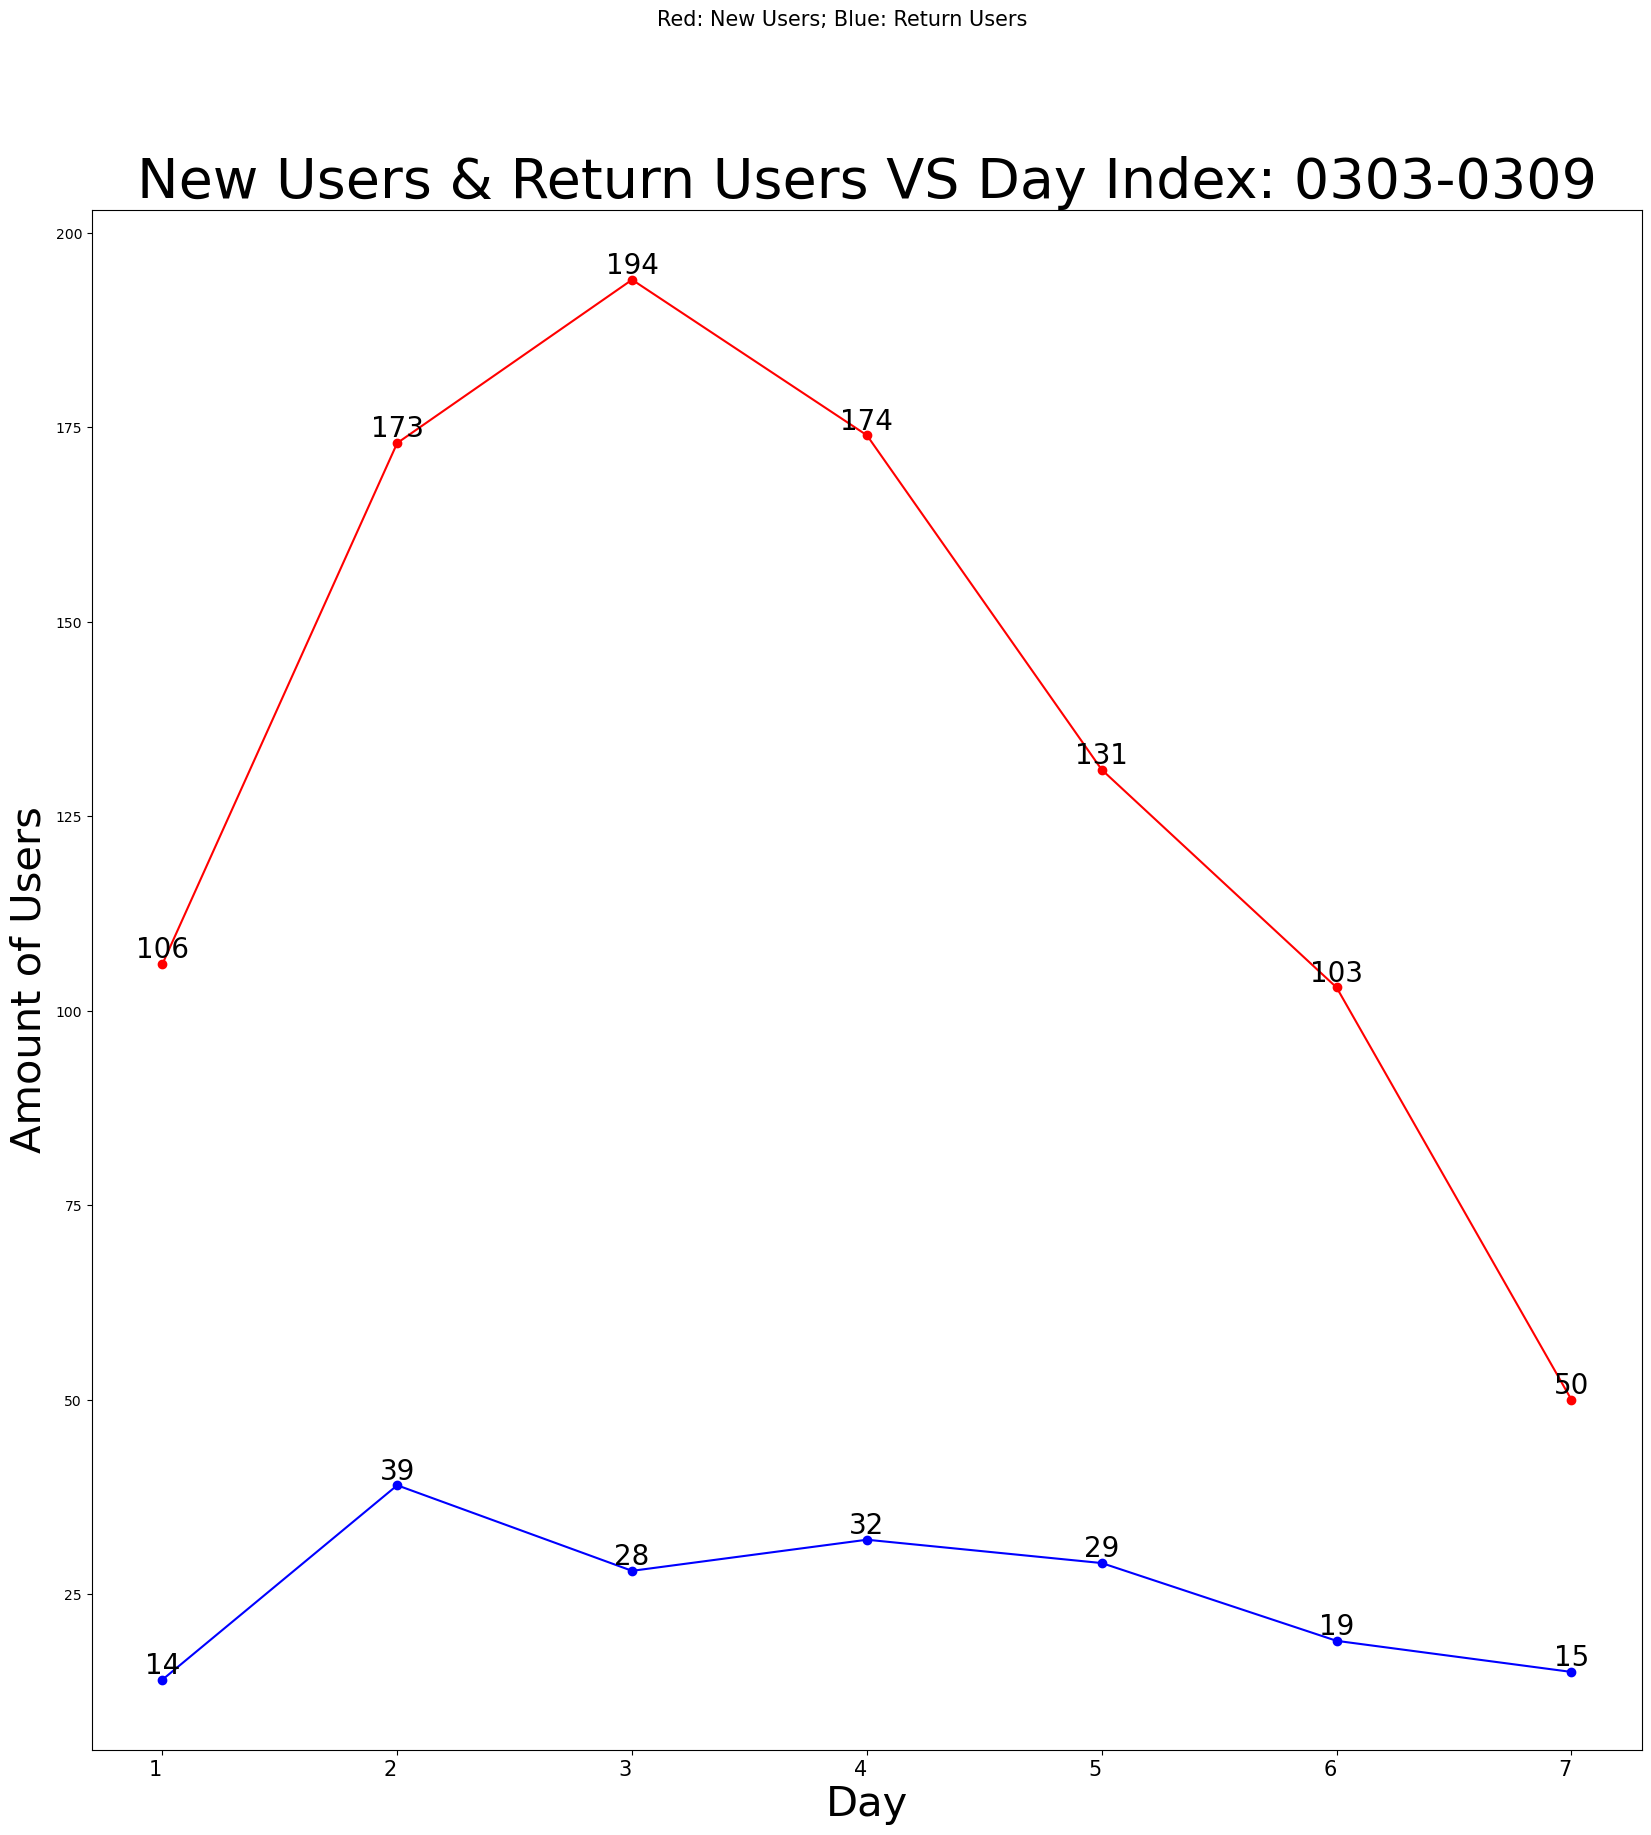

In [5]:
stacked_user(timerange="0303-0309", txtfont=20)